# Get data

Download Simpsons data set from Kaggle using instructions from https://www.kaggle.com/general/74235

In [21]:
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3 get-pip.py --user

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1659k  100 1659k    0     0  10.8M      0 --:--:-- --:--:-- --:--:-- 10.8M
  Using cached https://files.pythonhosted.org/packages/d8/f3/413bab4ff08e1fc4828dfc59996d721917df8e8583ea85385d51125dceff/pip-19.0.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d1/6a/4b2fcefd2ea0868810e92d519dacac1ddc64a2e53ba9e3422c3b62b378a6/setuptools-40.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/96/ba/a4702cbb6a3a485239fbe9525443446203f00771af9ac000fa3ef2788201/wheel-0.33.1-py2.py3-none-any.whl
  The script wheel is installed in '/home/anton/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
!~/.local/bin/pip install -q kaggle --user

  The script slugify is installed in '/home/anton/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  The script tqdm is installed in '/home/anton/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  The script kaggle is installed in '/home/anton/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [25]:
!mkdir ~/.kaggle
!cp ~/notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/home/anton/.kaggle’: File exists


Data is from:

https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

In [26]:
!~/.local/bin/kaggle datasets download alexattia/the-simpsons-characters-dataset

 99%|█████████████████████████████████████▋| 1.06G/1.07G [00:27<00:00, 51.3MB/s]
100%|██████████████████████████████████████| 1.07G/1.07G [00:27<00:00, 41.3MB/s]


In [28]:
!unzip the-simpsons-characters-dataset.zip

Archive:  the-simpsons-characters-dataset.zip
  inflating: number_pic_char.csv     
  inflating: annotation.txt          
  inflating: simpsons_dataset.tar.gz  
  inflating: characters_illustration.png  
  inflating: simpsons_dataset.zip    
  inflating: kaggle_simpson_testset.zip  
  inflating: weights.best.hdf5       


In [30]:
!unzip -qq simpsons_dataset.zip

In [33]:
!ls simpsons_dataset

abraham_grampa_simpson	  hans_moleman	       moe_szyslak
agnes_skinner		  helen_lovejoy        ned_flanders
apu_nahasapeemapetilon	  homer_simpson        nelson_muntz
barney_gumble		  jasper_beardly       otto_mann
bart_simpson		  jimbo_jones	       patty_bouvier
bumblebee_man		  kent_brockman        principal_skinner
carl_carlson		  krusty_the_clown     professor_john_frink
charles_montgomery_burns  lenny_leonard        rainier_wolfcastle
chief_wiggum		  lionel_hutz	       ralph_wiggum
cletus_spuckler		  lisa_simpson	       selma_bouvier
comic_book_guy		  maggie_simpson       sideshow_bob
disco_stu		  marge_simpson        sideshow_mel
edna_krabappel		  martin_prince        snake_jailbird
fat_tony		  mayor_quimby	       troy_mcclure
gil			  milhouse_van_houten  waylon_smithers
groundskeeper_willie	  miss_hoover


# Train

In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
from fastai.vision import *
from fastai.metrics import error_rate

In [36]:
np.random.seed(2)
bs = 64 # batch size

In [38]:
data = ImageDataBunch.from_folder(r'simpsons_dataset', valid_pct=0.2,
    ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

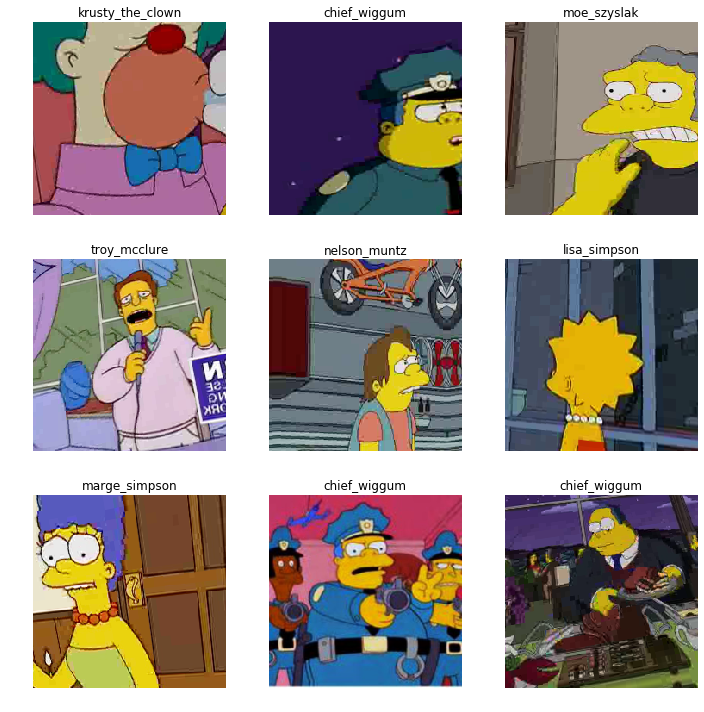

In [39]:
data.show_batch(rows=3, figsize=(10,10))

In [40]:
data.classes[:5]

['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson']

In [41]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [42]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,1.314733,0.718954,0.188008,02:15
2,0.665607,0.413469,0.115624,02:07
3,0.491433,0.327332,0.089345,02:09
4,0.394951,0.314632,0.082895,02:09


In [43]:
learn.save('stage-1')

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

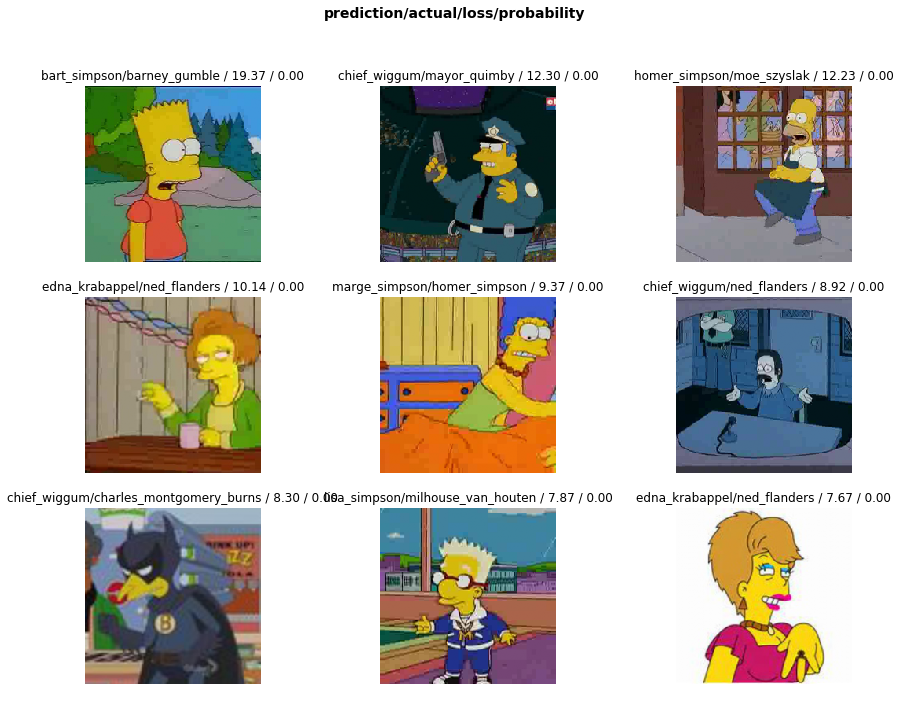

In [45]:
interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [46]:
interp.most_confused(min_val=2)

[('principal_skinner', 'moe_szyslak', 7),
 ('homer_simpson', 'krusty_the_clown', 6),
 ('maggie_simpson', 'lisa_simpson', 6),
 ('moe_szyslak', 'principal_skinner', 6),
 ('abraham_grampa_simpson', 'homer_simpson', 5),
 ('moe_szyslak', 'homer_simpson', 5),
 ('ned_flanders', 'chief_wiggum', 5),
 ('charles_montgomery_burns', 'homer_simpson', 4),
 ('homer_simpson', 'charles_montgomery_burns', 4),
 ('homer_simpson', 'milhouse_van_houten', 4),
 ('homer_simpson', 'ned_flanders', 4),
 ('lisa_simpson', 'maggie_simpson', 4),
 ('marge_simpson', 'milhouse_van_houten', 4),
 ('martin_prince', 'homer_simpson', 4),
 ('principal_skinner', 'homer_simpson', 4),
 ('charles_montgomery_burns', 'chief_wiggum', 3),
 ('charles_montgomery_burns', 'moe_szyslak', 3),
 ('charles_montgomery_burns', 'principal_skinner', 3),
 ('chief_wiggum', 'moe_szyslak', 3),
 ('homer_simpson', 'bart_simpson', 3),
 ('mayor_quimby', 'chief_wiggum', 3),
 ('moe_szyslak', 'comic_book_guy', 3),
 ('moe_szyslak', 'krusty_the_clown', 3),
 ('

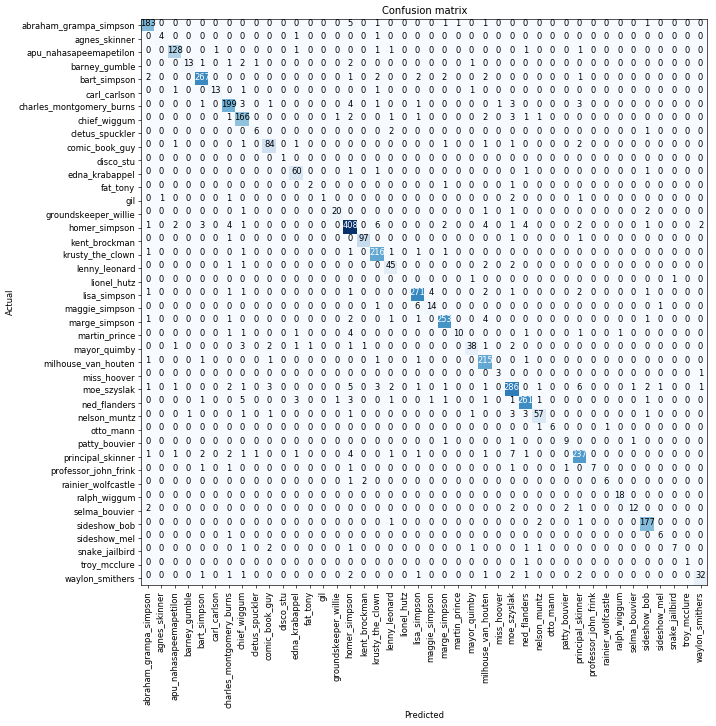

In [47]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [48]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


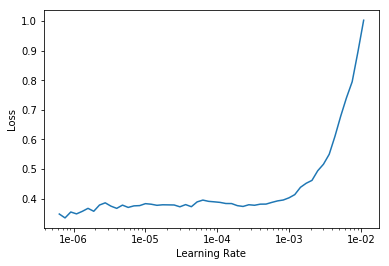

In [49]:
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
1,0.306885,0.213197,0.056856,02:58
2,0.162664,0.142938,0.034161,03:00


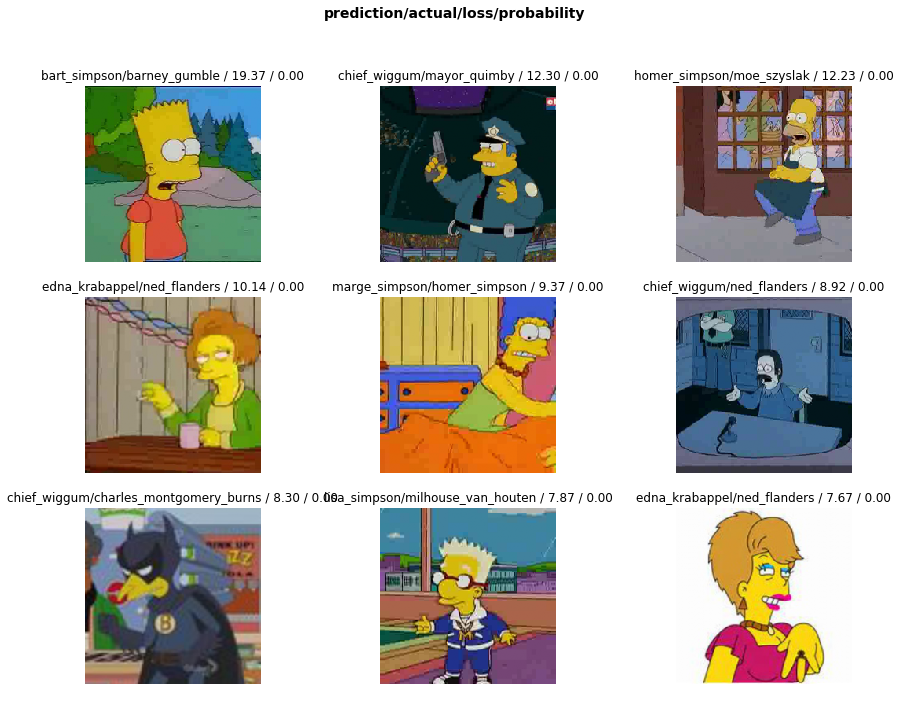

In [51]:
interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)